## Trabalho Prático de Grupo - Previsão do fluxo de tráfego rodoviário

#### A modelação do fluxo de tráfego rodoviário é um conhecido problema de características estocásticas, não-lineares. Tem, contudo, aparecido na literatura um conjunto de modelos que demonstram um potencial assinalável neste tipo de previsões. Com isso em consideração, foi construído um dataset que contém dados referentes ao tráfego de veículos na cidade do Porto durante um período superior a 1 ano. O dataset cobre um período que vai desde o dia 24 de julho de 2018 até ao dia 02 de outubro de 2019.

#### Com esta competição espera-se que os alunos desenvolvam e otimizem modelos de Machine Learning que sejam capazes de prever o fluxo de tráfego rodoviário, numa determinada hora, na cidade do Porto.

### Grupo-02

![Header](header.png)

<img align="right" src="umdi.png"> 

## Importar librarias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #mutilayer perceptor
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.3.0


## Ler dataset

In [3]:
training_data = pd.read_csv("training_data.csv", encoding='latin-1')
test_data = pd.read_csv("test_data.csv", encoding='latin-1')

## Analisar o dataset

#### Vamos ver as features que o dataset tem

In [4]:
training_data.columns

Index(['city_name', 'record_date', 'AVERAGE_SPEED_DIFF',
       'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN'],
      dtype='object')

#### Vamos ver que tipo de dados estão nas features e se existe missing data

In [5]:
training_data.info()
print(training_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)



### O dataset tem 13 features e duas colunas com missing data (AVERAGE_CLOUDINESS e AVERAGE_RAIN )


In [6]:
test_data.info()
print(test_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                1500 non-null   object 
 1   record_date              1500 non-null   object 
 2   AVERAGE_FREE_FLOW_SPEED  1500 non-null   float64
 3   AVERAGE_TIME_DIFF        1500 non-null   float64
 4   AVERAGE_FREE_FLOW_TIME   1500 non-null   float64
 5   LUMINOSITY               1500 non-null   object 
 6   AVERAGE_TEMPERATURE      1500 non-null   float64
 7   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 8   AVERAGE_HUMIDITY         1500 non-null   float64
 9   AVERAGE_WIND_SPEED       1500 non-null   float64
 10  AVERAGE_CLOUDINESS       901 non-null    object 
 11  AVERAGE_PRECIPITATION    1500 non-null   float64
 12  AVERAGE_RAIN             140 non-null    object 
dtypes: float64(8), object(5)
memory usage: 152.5+ KB
city_name                    

### O mesmo aplica-se a test_data

#### Vamos ver a destribuição dos valores

### Podemos ver que existe uma forte correlação entre AVERAGE_SPEED_DIFF e AVERAGE_TIME_DIFF

<function matplotlib.pyplot.show(close=None, block=None)>

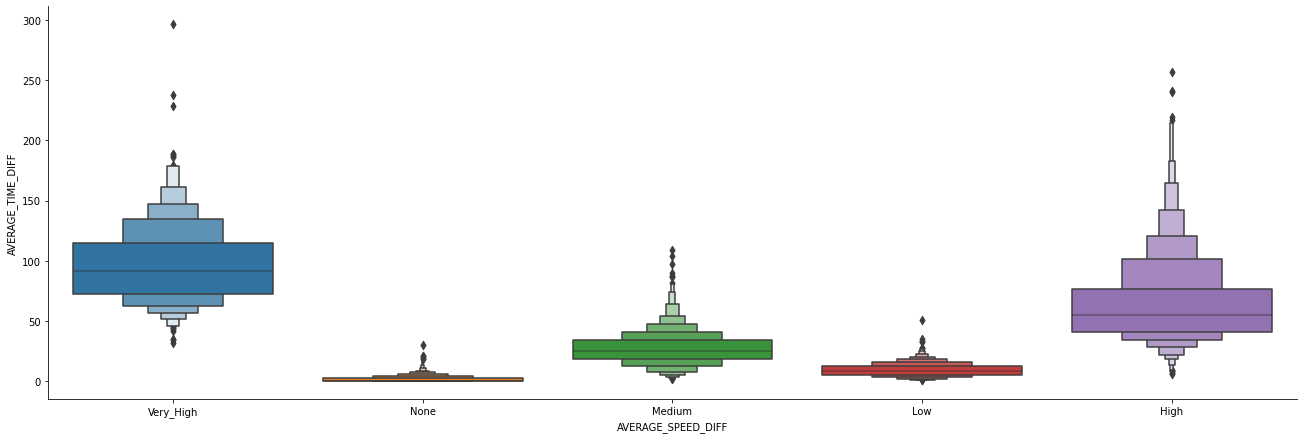

In [7]:
sns.catplot(y='AVERAGE_TIME_DIFF',x='AVERAGE_SPEED_DIFF',data= training_data.sort_values('AVERAGE_SPEED_DIFF',ascending=False),kind="boxen",height=6, aspect=3,)
plt.show

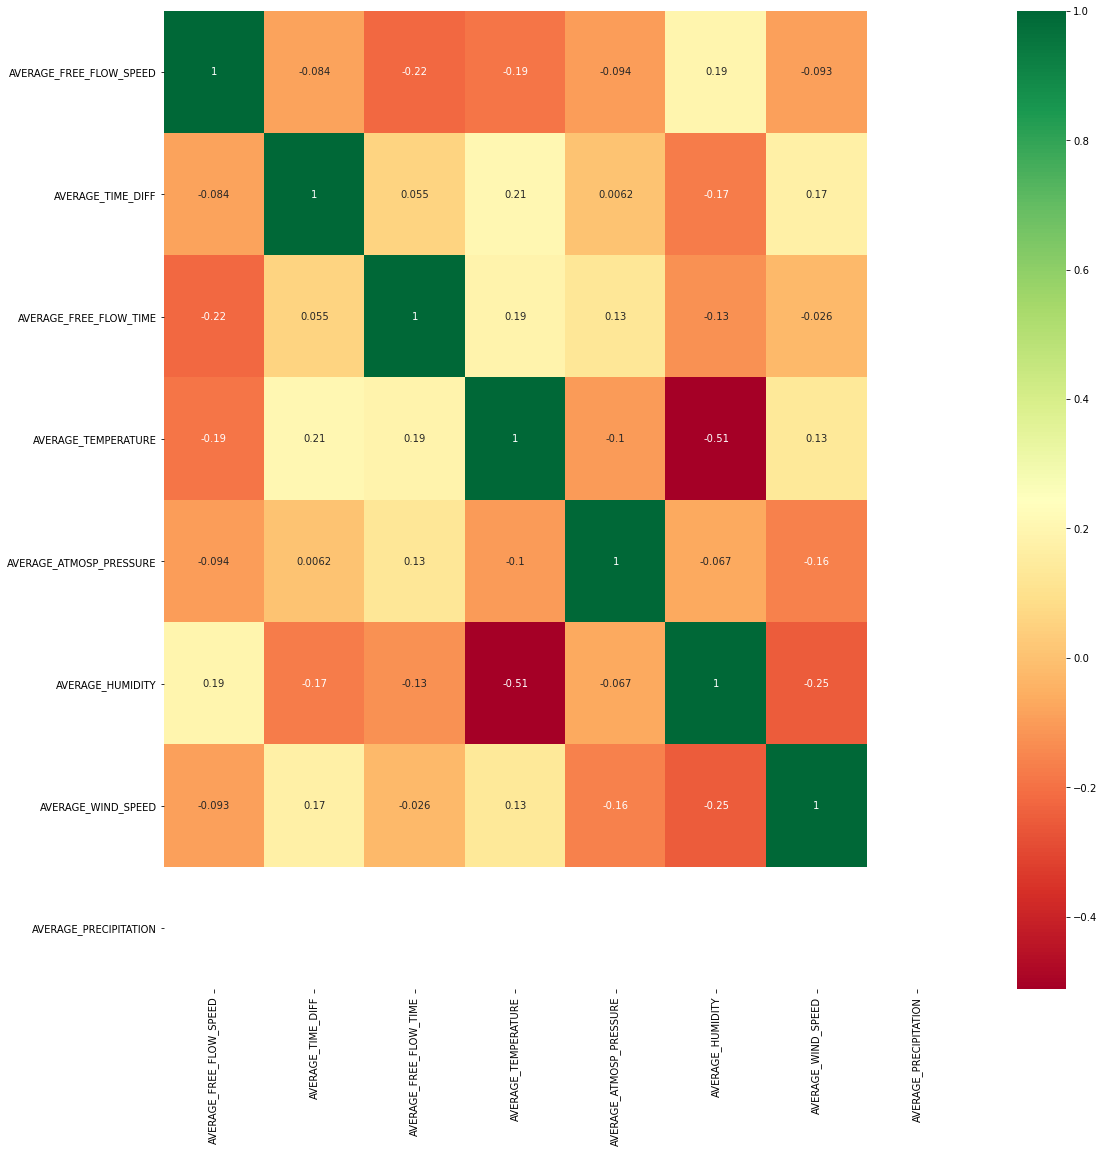

In [8]:
plt.figure(figsize=(18,18))
sns.heatmap(training_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

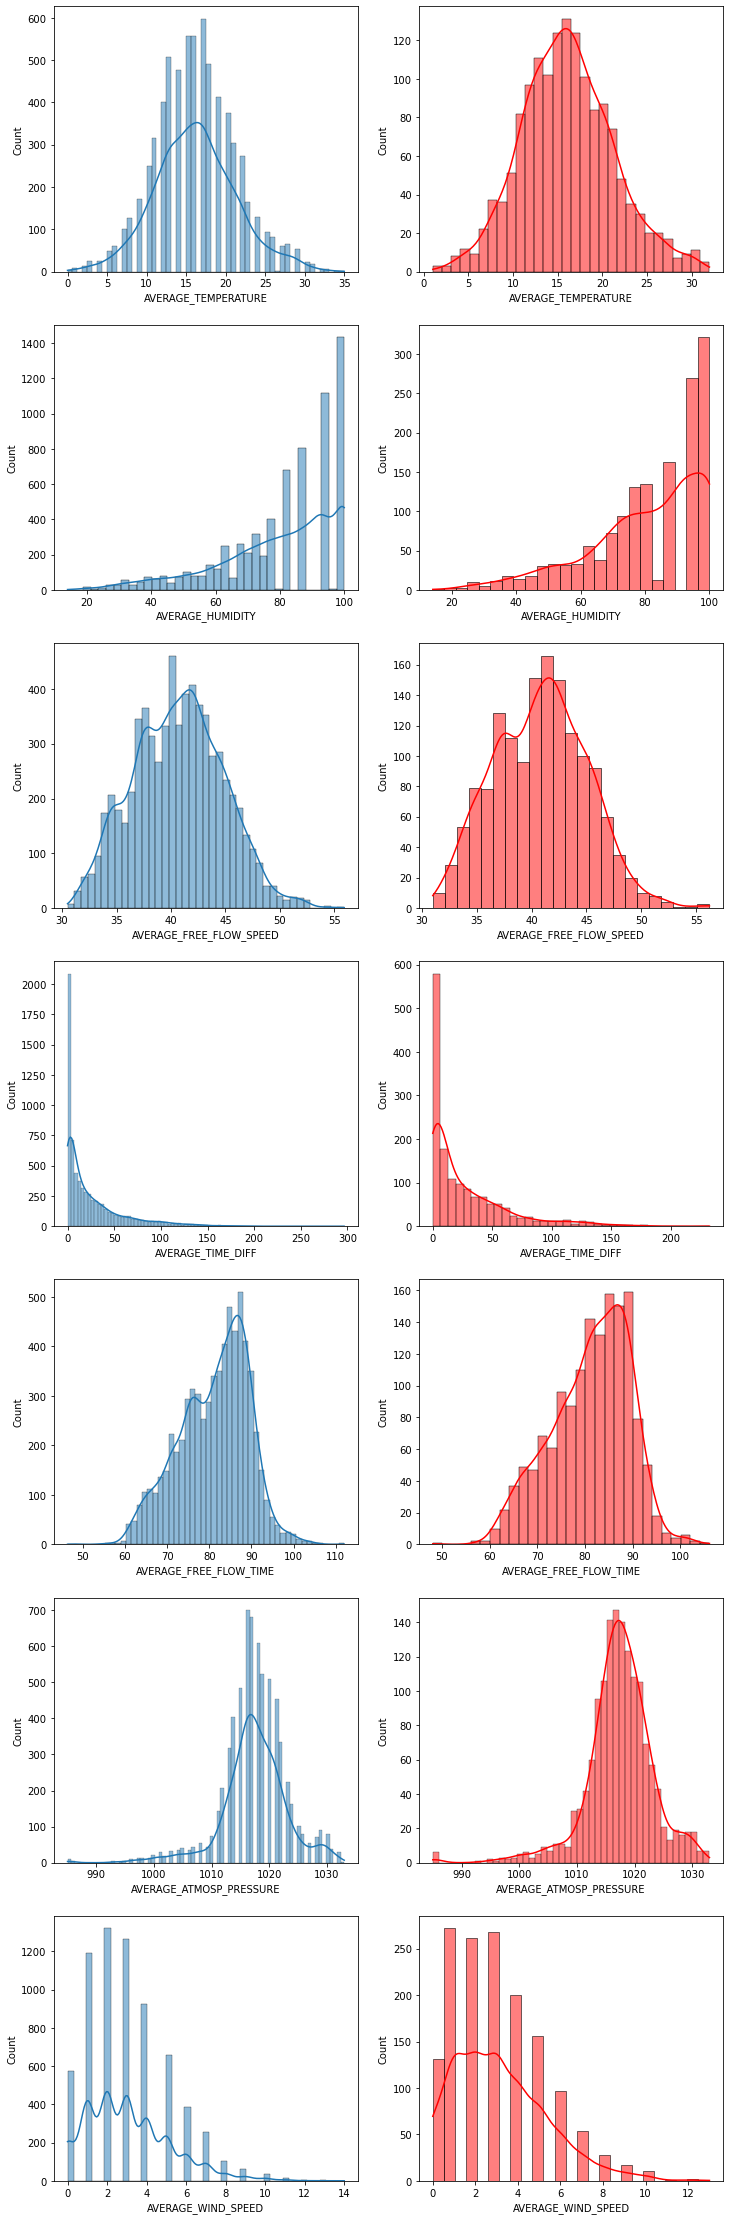

In [9]:
fig, axs = plt.subplots(7,2)

sns.histplot(training_data['AVERAGE_TEMPERATURE'], kde=True,ax=axs[0][0])
sns.histplot(test_data['AVERAGE_TEMPERATURE'], kde=True,ax=axs[0][1],color='red')

sns.histplot(training_data['AVERAGE_HUMIDITY'], kde=True,ax=axs[1][0])
sns.histplot(test_data['AVERAGE_HUMIDITY'], kde=True,ax=axs[1][1],color='red')

sns.histplot(training_data['AVERAGE_FREE_FLOW_SPEED'], kde=True,ax=axs[2][0])
sns.histplot(test_data['AVERAGE_FREE_FLOW_SPEED'], kde=True,ax=axs[2][1],color='red')

sns.histplot(training_data['AVERAGE_TIME_DIFF'], kde=True,ax=axs[3][0])
sns.histplot(test_data['AVERAGE_TIME_DIFF'], kde=True,ax=axs[3][1],color='red')

sns.histplot(training_data['AVERAGE_FREE_FLOW_TIME'], kde=True,ax=axs[4][0])
sns.histplot(test_data['AVERAGE_FREE_FLOW_TIME'], kde=True,ax=axs[4][1],color='red')

sns.histplot(training_data['AVERAGE_ATMOSP_PRESSURE'], kde=True,ax=axs[5][0])
sns.histplot(test_data['AVERAGE_ATMOSP_PRESSURE'], kde=True,ax=axs[5][1],color='red')

sns.histplot(training_data['AVERAGE_WIND_SPEED'], kde=True,ax=axs[6][0])
sns.histplot(test_data['AVERAGE_WIND_SPEED'], kde=True,ax=axs[6][1],color='red')


fig.set_size_inches(12, 40)
plt.show()


#### Vamos ver algumas boxplots

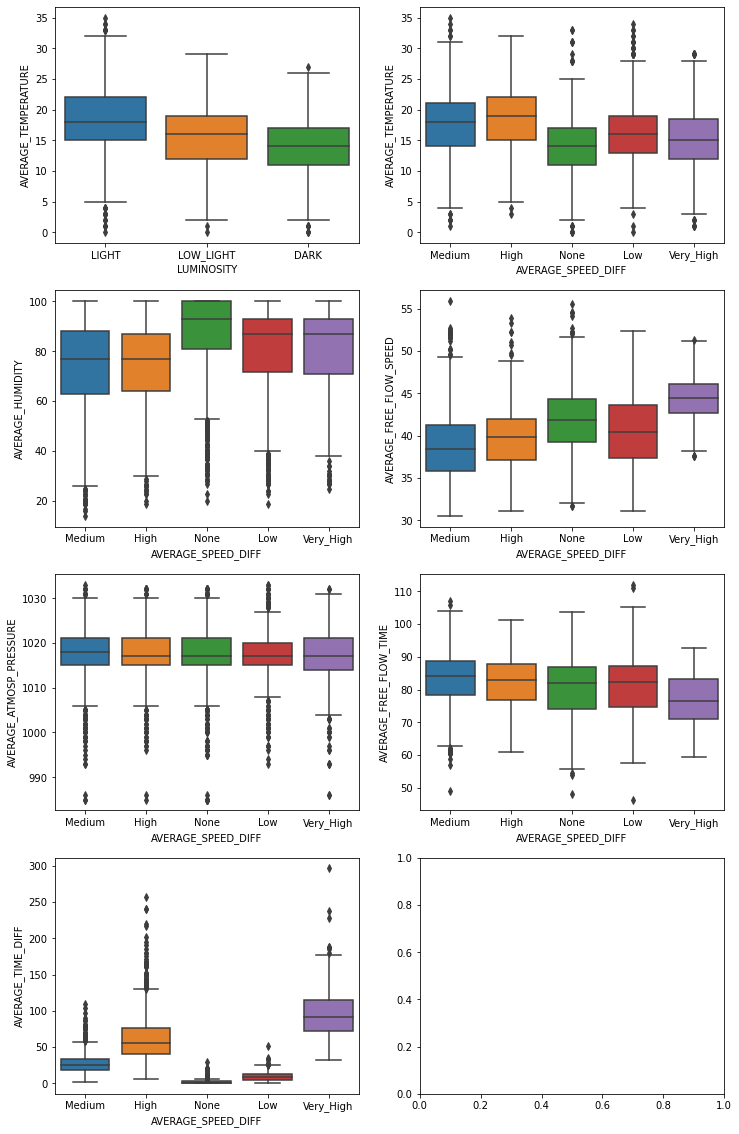

In [10]:
fig, axs = plt.subplots(4,2)

sns.boxplot(x=training_data["LUMINOSITY"], y=training_data["AVERAGE_TEMPERATURE"],ax=axs[0][0])
sns.boxplot(x=training_data["AVERAGE_SPEED_DIFF"], y=training_data["AVERAGE_TEMPERATURE"],ax=axs[0][1])
sns.boxplot(x=training_data["AVERAGE_SPEED_DIFF"], y=training_data["AVERAGE_HUMIDITY"],ax=axs[1][0])
sns.boxplot(x=training_data["AVERAGE_SPEED_DIFF"], y=training_data["AVERAGE_FREE_FLOW_SPEED"],ax=axs[1][1])

sns.boxplot(x=training_data["AVERAGE_SPEED_DIFF"], y=training_data["AVERAGE_ATMOSP_PRESSURE"],ax=axs[2][0])
sns.boxplot(x=training_data["AVERAGE_SPEED_DIFF"], y=training_data["AVERAGE_FREE_FLOW_TIME"],ax=axs[2][1])
sns.boxplot(x=training_data["AVERAGE_SPEED_DIFF"], y=training_data["AVERAGE_TIME_DIFF"],ax=axs[3][0])

fig.set_size_inches(12, 20)
plt.show()


#### Scatter plots

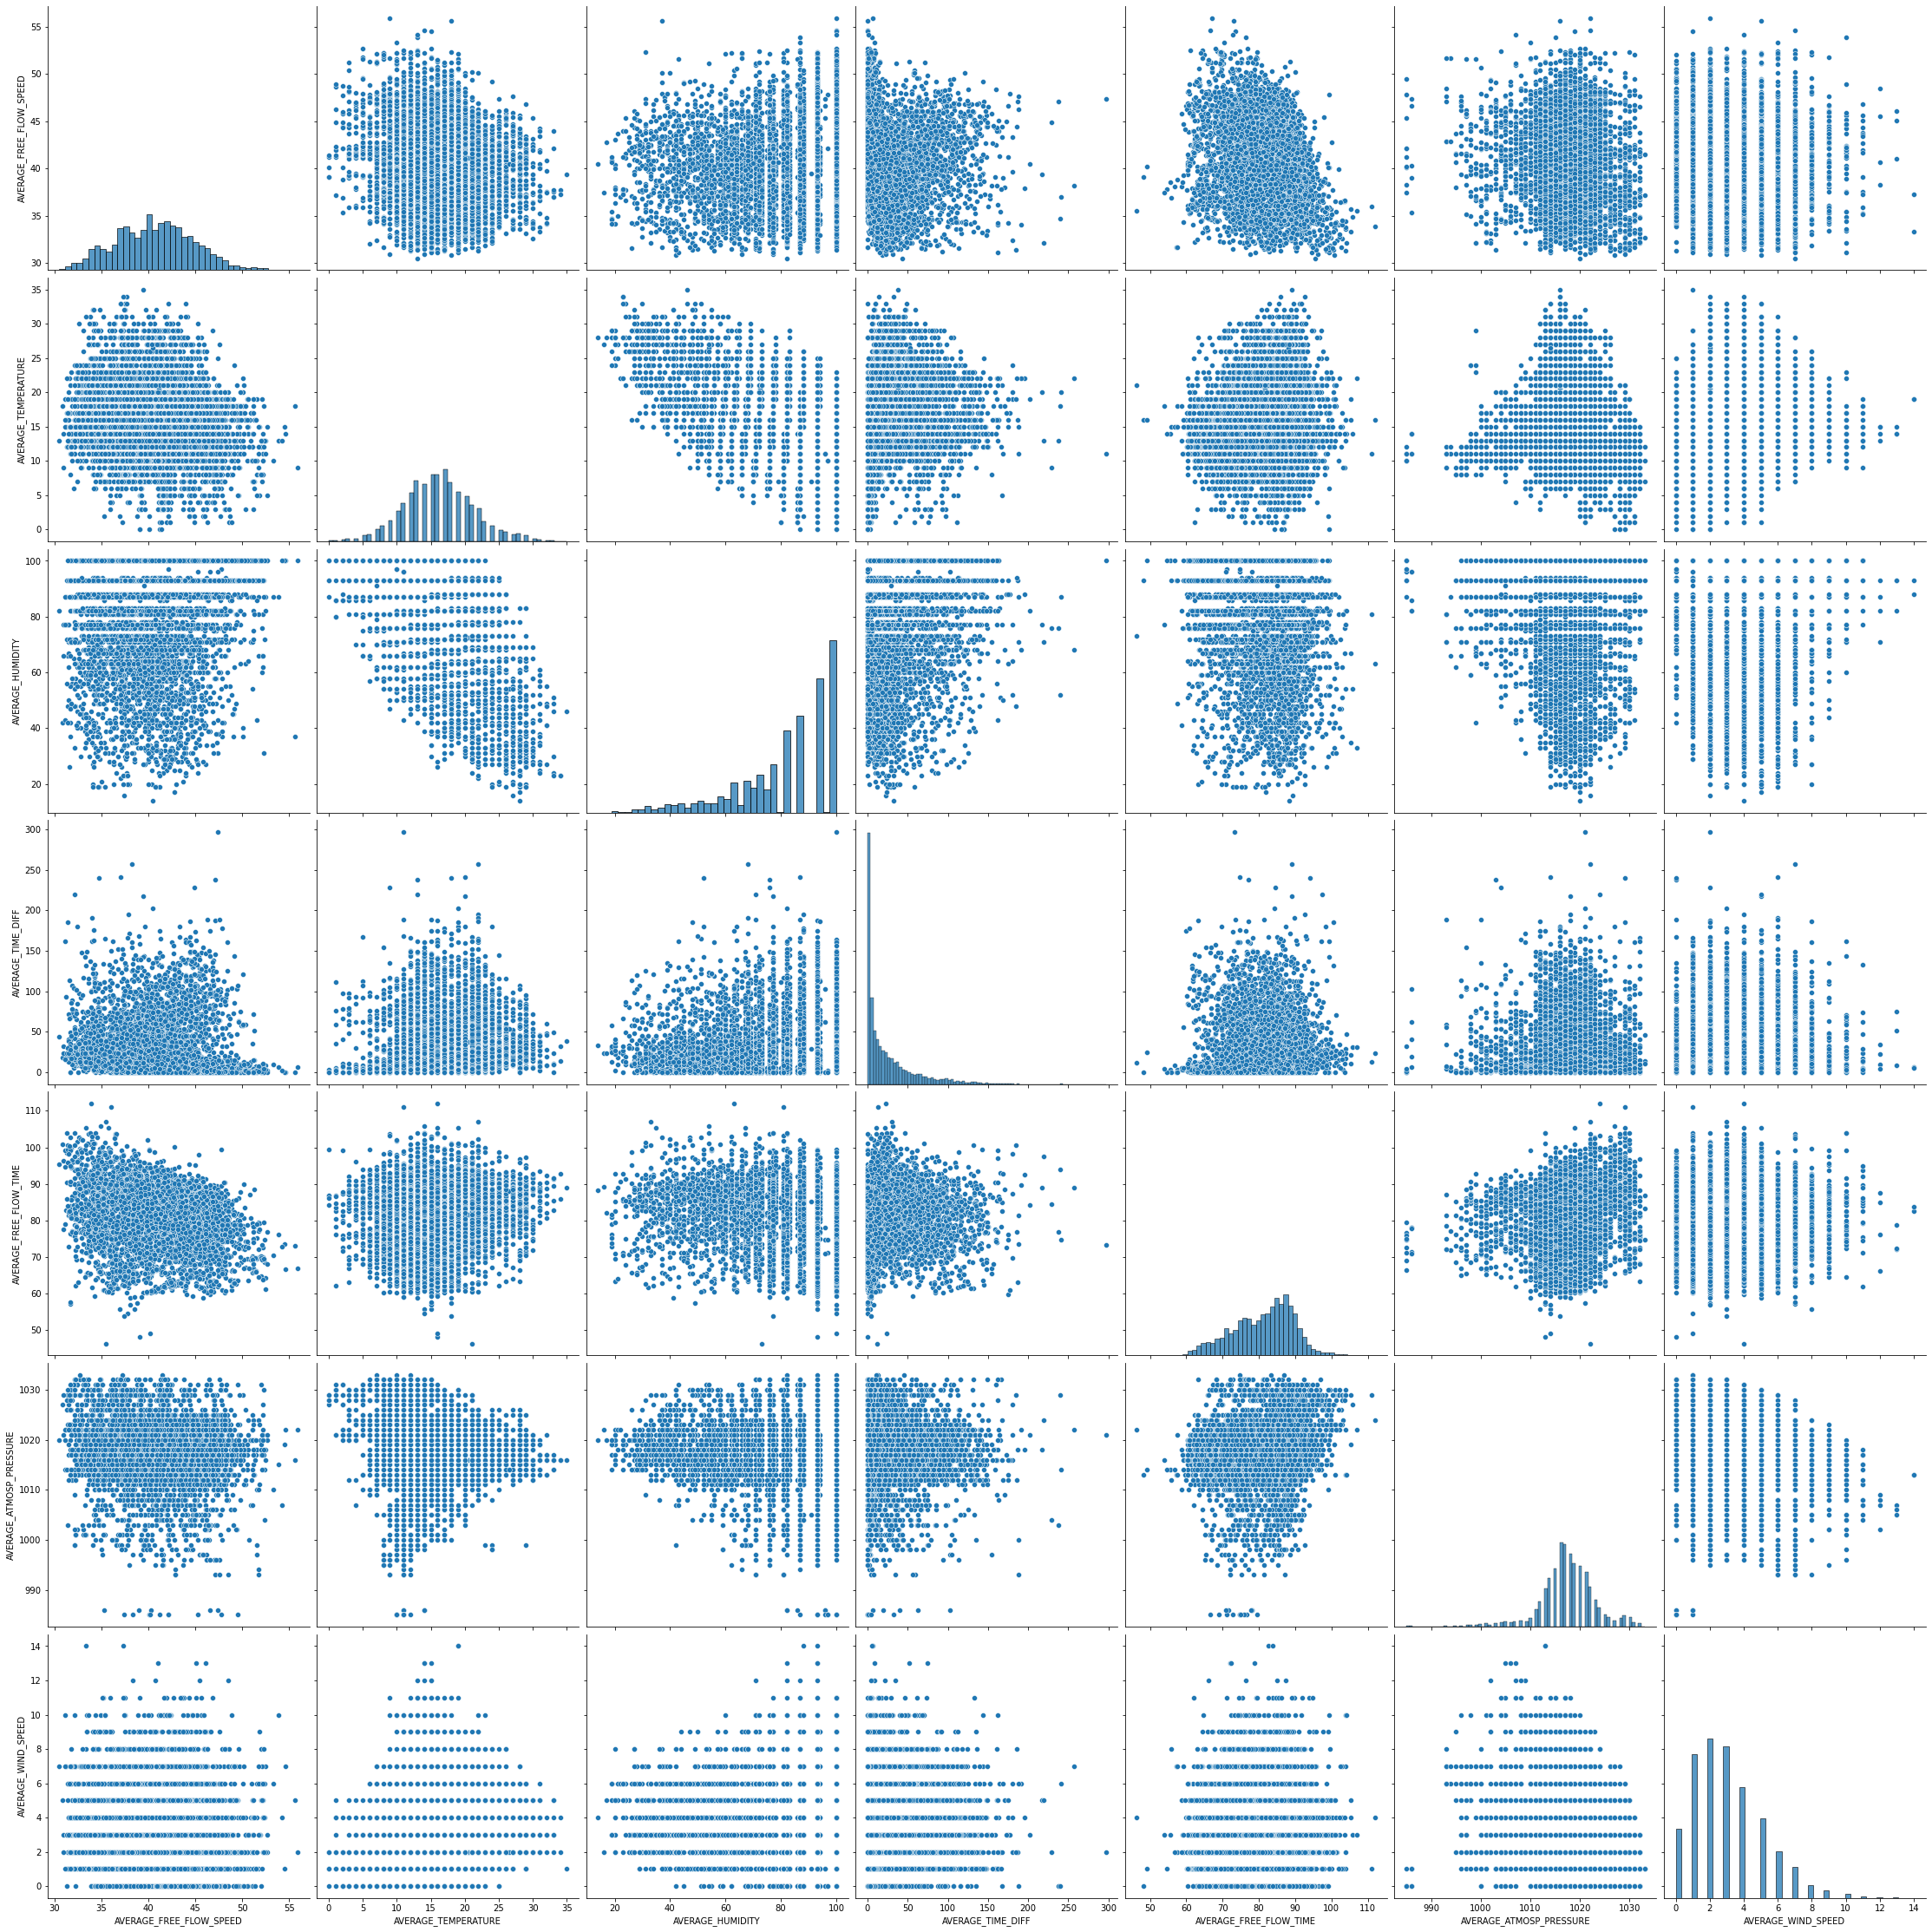

In [11]:
cols = ['AVERAGE_FREE_FLOW_SPEED','AVERAGE_TEMPERATURE', 'AVERAGE_HUMIDITY', 'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_WIND_SPEED','LUMINOSITY']
_ = sns.pairplot(training_data[cols], height = 4.5)

#### Correlation Matrix

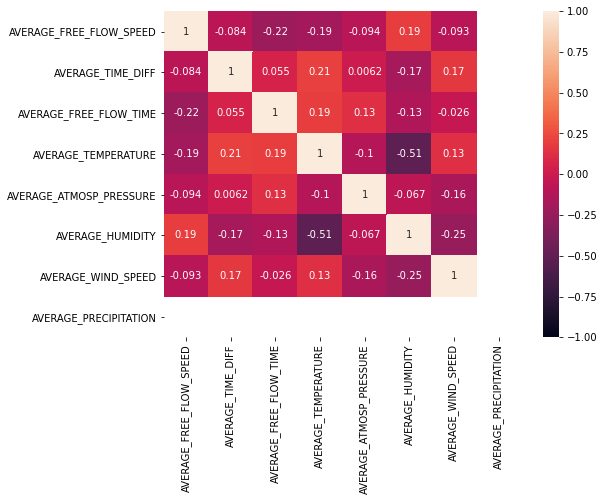

In [12]:
corr_matrix = training_data.corr()
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=False, annot=True);

## Preparar o dataset

#### Fazer drop das features desnecessarias

In [13]:
#City name é sempre porto logo pode-se fazer drop
#Drop
training_data = training_data.drop(['city_name'], axis=1)
test_data = test_data.drop(['city_name'], axis=1)
#Average percipitation é sempre 0 logo pode-se fazer drop
#training_data = training_data.drop(['AVERAGE_PRECIPITATION'], axis=1)
#test_data = test_data.drop(['AVERAGE_PRECIPITATION'], axis=1)

# Melhorar os dados de precipitação dando merge com um outro dataset.

In [14]:
precipitation_data = pd.read_csv("precipitationPortoHora.csv", encoding='latin-1')

In [15]:
precipitation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10416 entries, 0 to 10415
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   10416 non-null  int64  
 1   MO                     10416 non-null  int64  
 2   DY                     10416 non-null  int64  
 3   HR                     10416 non-null  int64  
 4   AVERAGE_PRECIPITATION  10416 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 407.0 KB


In [16]:
training_data.drop(columns='AVERAGE_PRECIPITATION', inplace=True)
test_data.drop(columns='AVERAGE_PRECIPITATION', inplace=True)

In [17]:
training_data['DAY'] = pd.DatetimeIndex(training_data['record_date']).day
training_data['MONTH'] = pd.DatetimeIndex(training_data['record_date']).month
training_data['YEAR'] = pd.DatetimeIndex(training_data['record_date']).year
training_data['HOUR'] = pd.DatetimeIndex(training_data['record_date']).hour

test_data['DAY'] = pd.DatetimeIndex(test_data['record_date']).day
test_data['MONTH'] = pd.DatetimeIndex(test_data['record_date']).month
test_data['YEAR'] = pd.DatetimeIndex(test_data['record_date']).year
test_data['HOUR'] = pd.DatetimeIndex(test_data['record_date']).hour

In [18]:
training_data = pd.merge(training_data, precipitation_data , how = 'left', left_on=['DAY','MONTH','YEAR', 'HOUR'], right_on=['DY', 'MO', 'YEAR', 'HR'])

test_data = pd.merge(test_data, precipitation_data , how = 'left', left_on=['DAY','MONTH','YEAR', 'HOUR'], right_on=['DY', 'MO', 'YEAR', 'HR'])

In [19]:
training_data.drop(columns=['DAY','MONTH','YEAR', 'HOUR', 'DY', 'MO', 'YEAR', 'HR'], inplace=True)

test_data.drop(columns=['DAY','MONTH','YEAR', 'HOUR', 'DY', 'MO', 'YEAR', 'HR'], inplace=True)

#### Usar boxplots para ver outliers

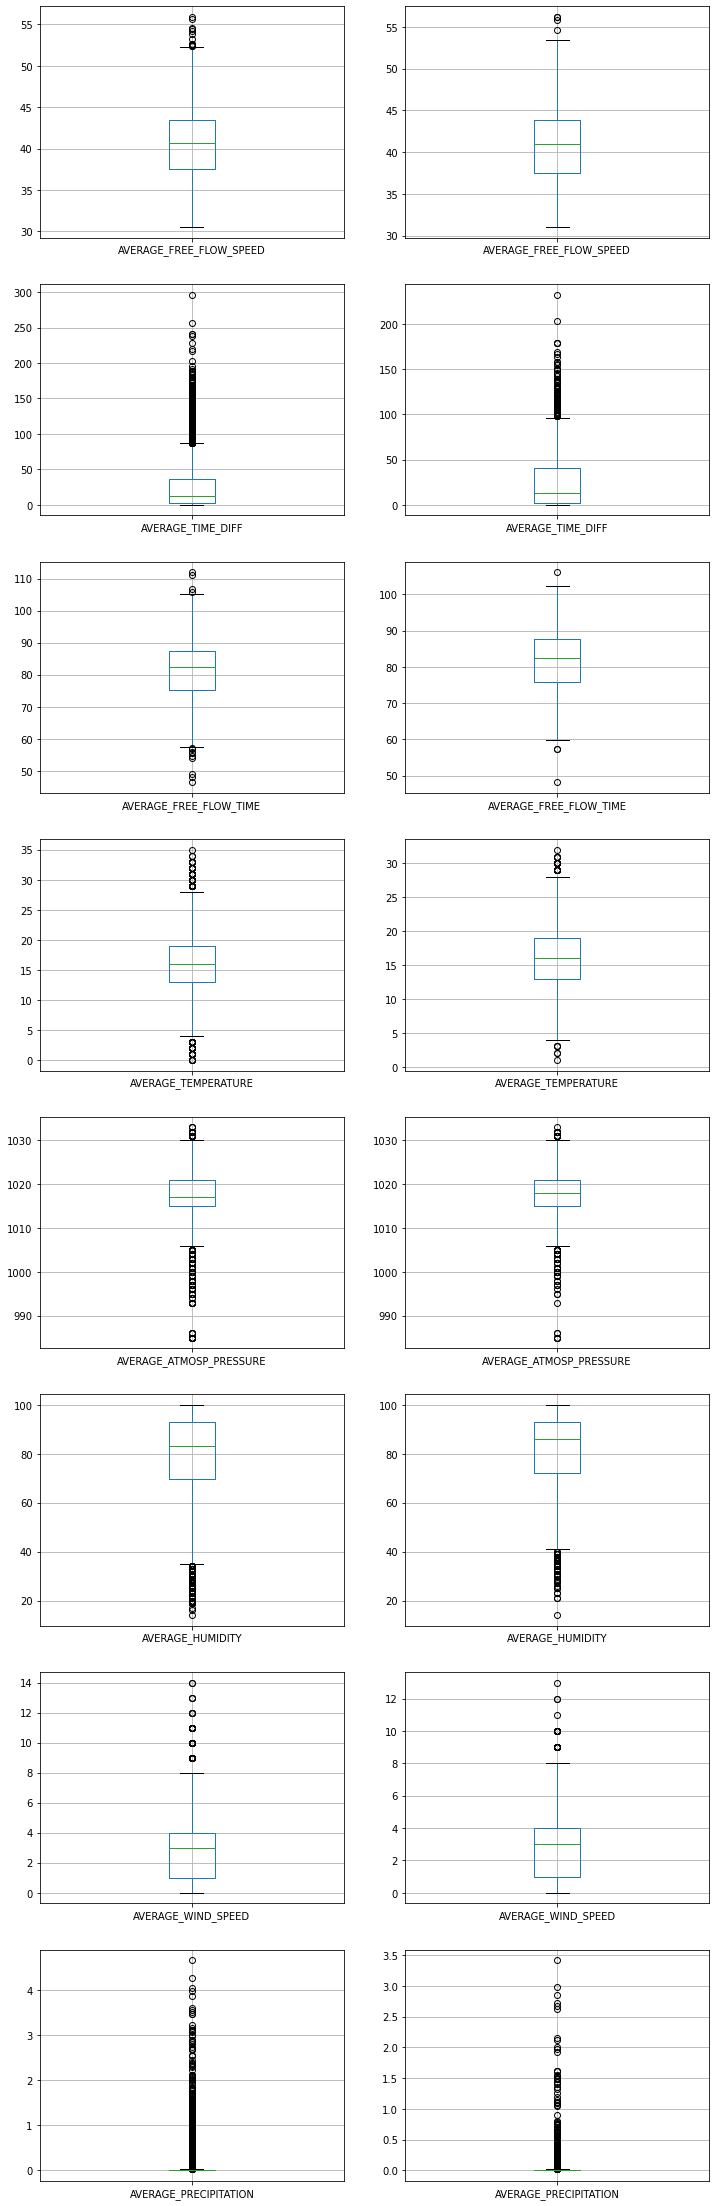

In [20]:
fig, axs = plt.subplots(8,2)
#plt.figure(fig=(18,18))
training_data.boxplot(column='AVERAGE_FREE_FLOW_SPEED', ax=axs[0][0])
test_data.boxplot(column='AVERAGE_FREE_FLOW_SPEED', ax=axs[0][1])#,color='red')

training_data.boxplot(column='AVERAGE_TIME_DIFF', ax=axs[1][0])
test_data.boxplot(column='AVERAGE_TIME_DIFF', ax=axs[1][1])#,color='red')

training_data.boxplot(column='AVERAGE_FREE_FLOW_TIME', ax=axs[2][0])
test_data.boxplot(column='AVERAGE_FREE_FLOW_TIME', ax=axs[2][1])#,color='red')

training_data.boxplot(column='AVERAGE_TEMPERATURE', ax=axs[3][0])
test_data.boxplot(column='AVERAGE_TEMPERATURE', ax=axs[3][1])#,color='red')

training_data.boxplot(column='AVERAGE_ATMOSP_PRESSURE', ax=axs[4][0])
test_data.boxplot(column='AVERAGE_ATMOSP_PRESSURE', ax=axs[4][1])#,color='red')

training_data.boxplot(column='AVERAGE_HUMIDITY', ax=axs[5][0])
test_data.boxplot(column='AVERAGE_HUMIDITY', ax=axs[5][1])#,color='red')

training_data.boxplot(column='AVERAGE_WIND_SPEED', ax=axs[6][0])
test_data.boxplot(column='AVERAGE_WIND_SPEED', ax=axs[6][1])#,color='red')

training_data.boxplot(column='AVERAGE_PRECIPITATION', ax=axs[7][0])
test_data.boxplot(column='AVERAGE_PRECIPITATION', ax=axs[7][1])#,color='red')

fig.set_size_inches(12, 40)
plt.show()

### Remover outliers

In [21]:
#Remover outliers da training_data
training_data['AVERAGE_FREE_FLOW_SPEED']=winsorize(training_data['AVERAGE_FREE_FLOW_SPEED'],(0.01,0.02))
training_data['AVERAGE_TIME_DIFF']=winsorize(training_data['AVERAGE_TIME_DIFF'],(0.01,0.08))
training_data['AVERAGE_FREE_FLOW_TIME']=winsorize(training_data['AVERAGE_FREE_FLOW_TIME'],(0.02,0.02))
training_data['AVERAGE_TEMPERATURE']=winsorize(training_data['AVERAGE_TEMPERATURE'],(0.01,0.02))
training_data['AVERAGE_ATMOSP_PRESSURE']=winsorize(training_data['AVERAGE_ATMOSP_PRESSURE'],(0.02,0.02))
#training_data['AVERAGE_HUMIDITY']=winsorize(training_data['AVERAGE_HUMIDITY'],(0.03,0.02))
training_data['AVERAGE_WIND_SPEED']=winsorize(training_data['AVERAGE_WIND_SPEED'],(0.01,0.02))
#Remover outlier das testing_data
test_data['AVERAGE_FREE_FLOW_SPEED']=winsorize(test_data['AVERAGE_FREE_FLOW_SPEED'],(0.01,0.1))
test_data['AVERAGE_TIME_DIFF']=winsorize(test_data['AVERAGE_TIME_DIFF'],(0.01,0.08))
test_data['AVERAGE_FREE_FLOW_TIME']=winsorize(test_data['AVERAGE_FREE_FLOW_TIME'],(0.02,0.02))
test_data['AVERAGE_TEMPERATURE']=winsorize(test_data['AVERAGE_TEMPERATURE'],(0.01,0.02))
test_data['AVERAGE_ATMOSP_PRESSURE']=winsorize(test_data['AVERAGE_ATMOSP_PRESSURE'],(0.02,0.02))
#test_data['AVERAGE_HUMIDITY']=winsorize(test_data['AVERAGE_HUMIDITY'],(0.03,0.01))
test_data['AVERAGE_WIND_SPEED']=winsorize(test_data['AVERAGE_WIND_SPEED'],(0.01,0.04))


### Averiguar se os outliers foram resolvidos

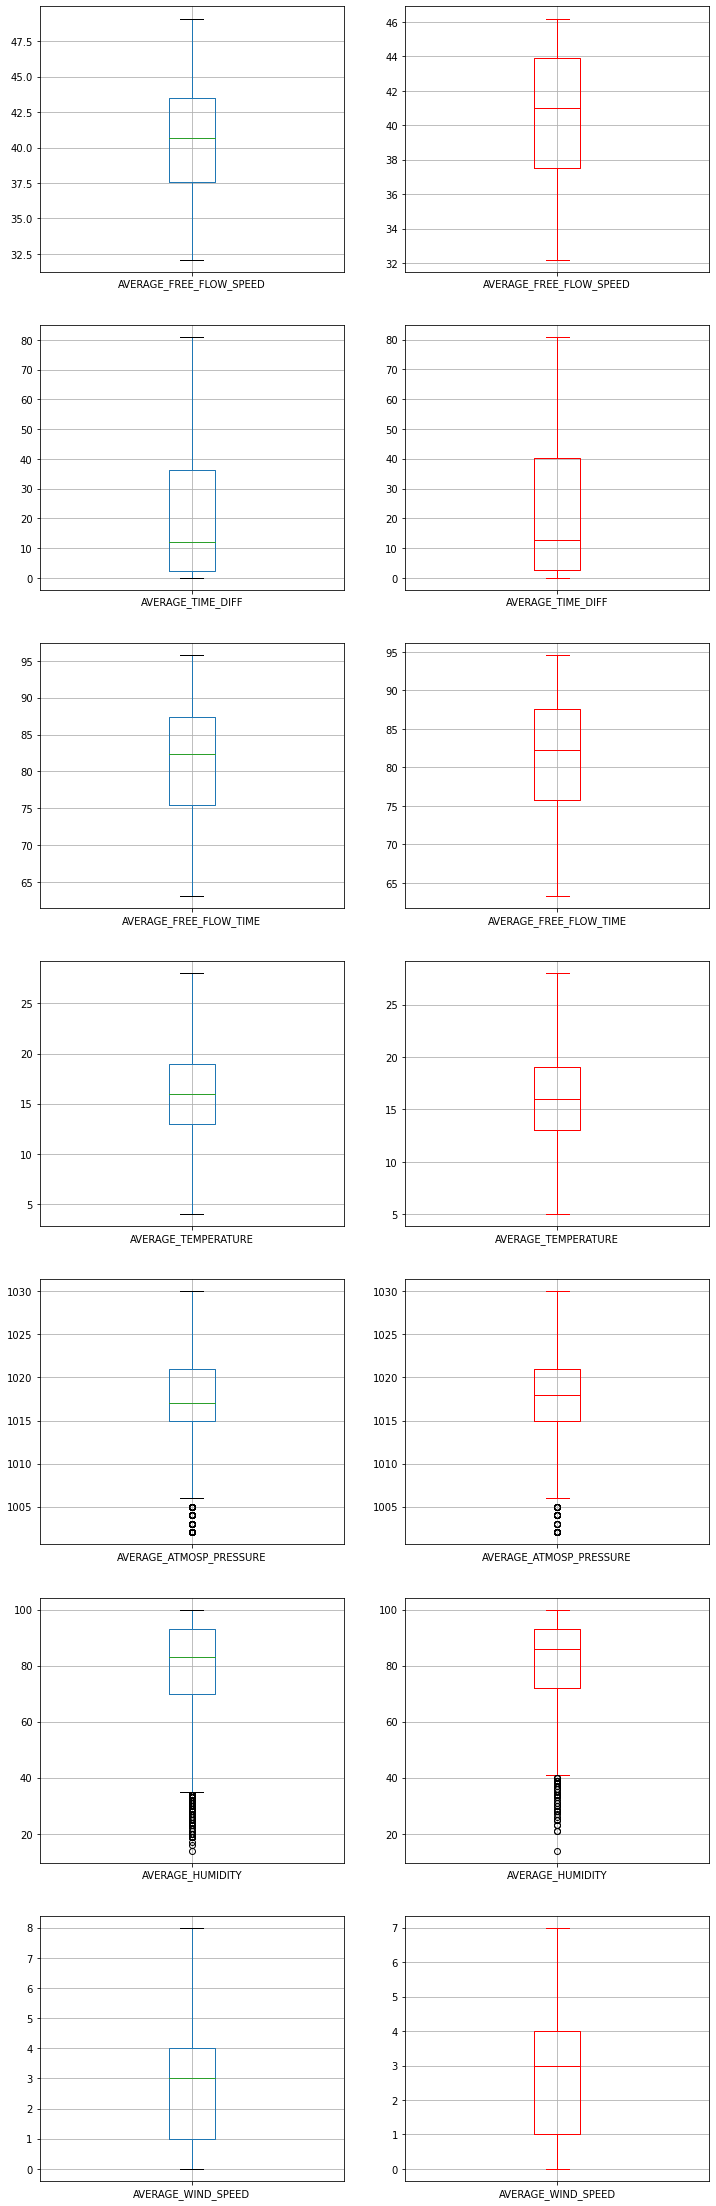

In [22]:
fig, axs = plt.subplots(7,2)
#plt.figure(fig=(18,18))
training_data.boxplot(column='AVERAGE_FREE_FLOW_SPEED', ax=axs[0][0])
test_data.boxplot(column='AVERAGE_FREE_FLOW_SPEED', ax=axs[0][1],color='red')

training_data.boxplot(column='AVERAGE_TIME_DIFF', ax=axs[1][0])
test_data.boxplot(column='AVERAGE_TIME_DIFF', ax=axs[1][1],color='red')

training_data.boxplot(column='AVERAGE_FREE_FLOW_TIME', ax=axs[2][0])
test_data.boxplot(column='AVERAGE_FREE_FLOW_TIME', ax=axs[2][1],color='red')

training_data.boxplot(column='AVERAGE_TEMPERATURE', ax=axs[3][0])
test_data.boxplot(column='AVERAGE_TEMPERATURE', ax=axs[3][1],color='red')

training_data.boxplot(column='AVERAGE_ATMOSP_PRESSURE', ax=axs[4][0])
test_data.boxplot(column='AVERAGE_ATMOSP_PRESSURE', ax=axs[4][1],color='red')

training_data.boxplot(column='AVERAGE_HUMIDITY', ax=axs[5][0])
test_data.boxplot(column='AVERAGE_HUMIDITY', ax=axs[5][1],color='red')

training_data.boxplot(column='AVERAGE_WIND_SPEED', ax=axs[6][0])
test_data.boxplot(column='AVERAGE_WIND_SPEED', ax=axs[6][1],color='red')

fig.set_size_inches(12, 40)
plt.show()

### Normalizar os datasets

In [23]:
#Precisamos de escalar certos valores para 0-1
training_data['AVERAGE_FREE_FLOW_SPEED'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_FREE_FLOW_SPEED']).reshape(-1,1))
training_data['AVERAGE_TIME_DIFF'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_TIME_DIFF']).reshape(-1,1))
training_data['AVERAGE_FREE_FLOW_TIME'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_FREE_FLOW_TIME']).reshape(-1,1))
training_data['AVERAGE_TEMPERATURE'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_TEMPERATURE']).reshape(-1,1))
training_data['AVERAGE_ATMOSP_PRESSURE'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_ATMOSP_PRESSURE']).reshape(-1,1))
training_data['AVERAGE_HUMIDITY'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_HUMIDITY']).reshape(-1,1))
training_data['AVERAGE_WIND_SPEED'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_WIND_SPEED']).reshape(-1,1))
training_data['AVERAGE_PRECIPITATION'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_PRECIPITATION']).reshape(-1,1))

test_data['AVERAGE_FREE_FLOW_SPEED'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_FREE_FLOW_SPEED']).reshape(-1,1))
test_data['AVERAGE_TIME_DIFF'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_TIME_DIFF']).reshape(-1,1))
test_data['AVERAGE_FREE_FLOW_TIME'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_FREE_FLOW_TIME']).reshape(-1,1))
test_data['AVERAGE_TEMPERATURE'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_TEMPERATURE']).reshape(-1,1))
test_data['AVERAGE_ATMOSP_PRESSURE'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_ATMOSP_PRESSURE']).reshape(-1,1))
test_data['AVERAGE_HUMIDITY'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_HUMIDITY']).reshape(-1,1))
test_data['AVERAGE_WIND_SPEED'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_WIND_SPEED']).reshape(-1,1))
test_data['AVERAGE_PRECIPITATION'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_PRECIPITATION']).reshape(-1,1))

In [24]:
training_data.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,AVERAGE_PRECIPITATION
0,2019-08-29 07:00:00,Medium,0.552941,0.141800,0.253823,LIGHT,0.458333,0.607143,1.000000,0.375,NaN,NaN,0.00000
1,2018-08-10 14:00:00,High,0.564706,0.595561,0.743119,LIGHT,0.708333,0.678571,0.453488,0.625,céu claro,NaN,0.00000
2,2019-09-01 16:00:00,High,0.382353,0.473490,0.675841,LIGHT,0.916667,0.428571,0.546512,0.500,NaN,NaN,0.00000
3,2019-02-26 11:00:00,High,0.311765,0.752158,0.948012,LIGHT,0.583333,0.821429,0.395349,0.500,céu claro,NaN,0.00000
4,2019-06-06 12:00:00,Medium,0.558824,0.621455,0.425076,LIGHT,0.458333,0.214286,0.790698,1.000,NaN,NaN,0.43133


In [25]:
test_data.head()

,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,AVERAGE_PRECIPITATION
0,2019-02-13 23:00:00,0.500000,0.000000,0.884984,DARK,0.130435,0.857143,0.662791,0.142857,céu claro,NaN,0.000000
1,2018-11-28 20:00:00,0.735714,0.150617,0.431310,DARK,0.260870,0.642857,0.918605,0.571429,nuvens dispersas,NaN,0.000000
2,2018-08-14 05:00:00,0.978571,0.000000,0.734824,DARK,0.391304,0.535714,0.918605,0.000000,NaN,NaN,0.000000
3,2019-07-06 17:00:00,0.071429,0.638272,0.849840,LIGHT,0.739130,0.500000,0.732558,0.571429,céu pouco nublado,NaN,0.000000
4,2018-10-15 06:00:00,0.842857,0.043210,0.709265,DARK,0.304348,0.071429,1.000000,1.000000,NaN,chuva fraca,0.409357


### Como pode-mos ver os datasets já estão normalizados

## Aproveitar a date para usar as horas

### Vamos criar uma nova coluna com o Nome "RUSH" que indica que é hora de ponta

In [26]:
dfdate= pd.to_datetime(training_data['record_date'])

bins = [0,7,9,12,14,17,19,24]

labels = ['00:00-06:59','07:00-08:59','12:00-13:59','17:00-18:59','19:00-24:00','09:00-11:59','14:00-16:00']

labels2 = ['07:00-08:59','12:00-13:59','17:00-18:59']

# add the bins to the dataframe
training_data['Time Bin'] = pd.cut(dfdate.dt.hour, bins, labels=labels, right=False, )
dfdate = pd.to_datetime(test_data['record_date'])
test_data['Time Bin'] = pd.cut(dfdate.dt.hour, bins, labels=labels, right=False)
  
def checkRush(cols):
    TimeBin=cols
    if TimeBin in labels2:
        return 1
    else:
        return 0


    
#Adicionar a training_data

training_data["Rush"] = training_data['Time Bin'].apply(checkRush)


test_data["Rush"] = test_data['Time Bin'].apply(checkRush)

training_data=training_data.drop('Time Bin',axis=1)
#Adicionar a test_data
test_data=test_data.drop('Time Bin',axis=1)

training_data.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,AVERAGE_PRECIPITATION,Rush
0,2019-08-29 07:00:00,Medium,0.552941,0.141800,0.253823,LIGHT,0.458333,0.607143,1.000000,0.375,NaN,NaN,0.00000,1
1,2018-08-10 14:00:00,High,0.564706,0.595561,0.743119,LIGHT,0.708333,0.678571,0.453488,0.625,céu claro,NaN,0.00000,0
2,2019-09-01 16:00:00,High,0.382353,0.473490,0.675841,LIGHT,0.916667,0.428571,0.546512,0.500,NaN,NaN,0.00000,0
3,2019-02-26 11:00:00,High,0.311765,0.752158,0.948012,LIGHT,0.583333,0.821429,0.395349,0.500,céu claro,NaN,0.00000,1
4,2019-06-06 12:00:00,Medium,0.558824,0.621455,0.425076,LIGHT,0.458333,0.214286,0.790698,1.000,NaN,NaN,0.43133,1


## Usar os dias da semana

### Vamos adicionar uma feature nova "IsDayOfWeek" para saber os fim-de-semana

In [27]:
def isweekday(cols):
    dayofweek=cols
    if dayofweek=='Saturday' or dayofweek=='Sunday':
        return 0
    else:
        return 1
#Training_data
dfdate= pd.to_datetime(training_data['record_date'])
asd= dfdate.dt.day_name()
training_data['IsDayOfWeek'] = asd.apply(isweekday)

#Test_data
dfdate= pd.to_datetime(test_data['record_date'])
asd= dfdate.dt.day_name()
test_data['IsDayOfWeek'] = asd.apply(isweekday)

## Feriados nacionais

### Vamos adicionar uma feature nova "IsHoliday" para saber em que dias é feriado

In [28]:
import holidays

dfdate= pd.to_datetime(training_data['record_date'])
dfdate_test= pd.to_datetime(test_data['record_date'])

df_justdate=dfdate.dt.date

pt_holidays = holidays.PT()

df_justdate_test = dfdate_test.dt.date

def isHoliday(cols):
    date=cols
    if date in pt_holidays :
       # print(date)
        return 1
    else:
        return 0

training_data['IsHoliday'] = df_justdate.apply(isHoliday)
test_data['IsHoliday'] = df_justdate_test.apply(isHoliday)

#### Por ultimo vamos remover a record_date visto que já retiramos tudo o que pretendia-mos

In [29]:
training_data = training_data.drop(['record_date'], axis=1)
test_data = test_data.drop(['record_date'], axis=1)

### Tratar da AVERAGE_CLOUDINESS

Preencher os valores em falta pela mean

In [30]:
#Training_data
training_data.replace(to_replace ="céu claro", value = 0.999999, inplace = True)
training_data.replace(to_replace ="céu limpo", value = 0.999999, inplace = True)
training_data.replace(to_replace ="nuvens dispersas", value = 0.666666, inplace = True)
training_data.replace(to_replace ="algumas nuvens", value = 0.666666, inplace = True)
training_data.replace(to_replace ="céu pouco nublado", value = 0.666666, inplace = True)
training_data.replace(to_replace ="nuvens quebrados", value = 0.666666, inplace = True)
training_data.replace(to_replace ="nuvens quebradas", value = 0.666666, inplace = True)
training_data.replace(to_replace ="nublado", value = 0.333333, inplace = True)
training_data.replace(to_replace ="tempo nublado", value = 0.333333, inplace = True)
training_data.replace(to_replace ="NULL", value = 0.3, inplace = True)
training_data.replace(to_replace =r'^\s*$', value = 0.3, regex=True, inplace = True)
training_data["AVERAGE_CLOUDINESS"] = training_data["AVERAGE_CLOUDINESS"].fillna("MISSING VALUE")
dftmp = training_data[training_data["AVERAGE_CLOUDINESS"]!="MISSING VALUE"]
mediaRAS = dftmp.mean()

training_data.replace(to_replace ="MISSING VALUE", value = mediaRAS, inplace = True)

#Test_data
test_data.replace(to_replace ="céu claro", value = 0.999999, inplace = True)
test_data.replace(to_replace ="céu limpo", value = 0.999999, inplace = True)
test_data.replace(to_replace ="nuvens dispersas", value = 0.666666, inplace = True)
test_data.replace(to_replace ="algumas nuvens", value = 0.666666, inplace = True)
test_data.replace(to_replace ="céu pouco nublado", value = 0.666666, inplace = True)
test_data.replace(to_replace ="nuvens quebrados", value = 0.666666, inplace = True)
test_data.replace(to_replace ="nuvens quebradas", value = 0.666666, inplace = True)
test_data.replace(to_replace ="nublado", value = 0.333333, inplace = True)
test_data.replace(to_replace ="tempo nublado", value = 0.333333, inplace = True)
test_data.replace(to_replace ="NULL", value = 0.3, inplace = True)
test_data.replace(to_replace =r'^\s*$', value = 0.3, regex=True, inplace = True)
test_data["AVERAGE_CLOUDINESS"] = test_data["AVERAGE_CLOUDINESS"].fillna("MISSING VALUE")
dftmp = test_data[test_data["AVERAGE_CLOUDINESS"]!="MISSING VALUE"]
mediaRAS = dftmp.mean()

test_data.replace(to_replace ="MISSING VALUE", value = mediaRAS, inplace = True)

### Tratar da luminosity

In [31]:
training_data.replace(to_replace ="DARK", value = 0, inplace = True)
training_data.replace(to_replace ="LOW_LIGHT", value = 0.5, inplace = True)
training_data.replace(to_replace ="LIGHT", value = 1, inplace = True)

test_data.replace(to_replace ="DARK", value = 0, inplace = True)
test_data.replace(to_replace ="LOW_LIGHT", value = 0.5, inplace = True)
test_data.replace(to_replace ="LIGHT", value = 1, inplace = True)

### Tratar da Rain

In [32]:

training_data.replace(to_replace ="chuva de intensidade pesada", value = 0.999999, inplace = True)
training_data.replace(to_replace ="trovoada com chuva", value = 0.999999, inplace = True)
training_data.replace(to_replace ="chuva de intensidade pesado", value = 0.999999, inplace = True)
training_data.replace(to_replace ="chuva forte", value = 0.999999, inplace = True)
training_data.replace(to_replace ="chuva", value = 0.666666, inplace = True)
training_data.replace(to_replace ="chuva moderada", value = 0.666666, inplace = True)
training_data.replace(to_replace ="aguaceiros", value = 0.666666, inplace = True)
training_data.replace(to_replace ="trovoada com chuva leve", value = 0.666666, inplace = True)
training_data.replace(to_replace ="chuva fraca", value = 0.333333, inplace = True)
training_data.replace(to_replace ="chuva leve", value = 0.333333, inplace = True)
training_data.replace(to_replace ="chuvisco fraco",  value = 0.333333, inplace = True)
training_data.replace(to_replace ="aguaceiros fracos", value = 0.333333, inplace = True)
training_data.replace(to_replace ="chuvisco e chuva fraca", value = 0.333333, inplace = True)
training_data["AVERAGE_RAIN"] = training_data["AVERAGE_RAIN"].fillna(0.3)
##TEST DATA
test_data.replace(to_replace ="chuva de intensidade pesada", value = 0.999999, inplace = True)
test_data.replace(to_replace ="trovoada com chuva", value = 0.999999, inplace = True)
test_data.replace(to_replace ="chuva de intensidade pesado", value = 0.999999, inplace = True)
test_data.replace(to_replace ="chuva forte", value = 0.999999, inplace = True)
test_data.replace(to_replace ="chuva", value = 0.666666, inplace = True)
test_data.replace(to_replace ="chuva moderada", value = 0.666666, inplace = True)
test_data.replace(to_replace ="aguaceiros", value = 0.666666, inplace = True)
test_data.replace(to_replace ="trovoada com chuva leve", value = 0.666666, inplace = True)
test_data.replace(to_replace ="chuva fraca", value = 0.333333, inplace = True)
test_data.replace(to_replace ="chuva leve", value = 0.333333, inplace = True)
test_data.replace(to_replace ="chuvisco fraco", value = 0.333333, inplace = True)
test_data.replace(to_replace ="aguaceiros fracos", value = 0.333333, inplace = True)
test_data.replace(to_replace ="chuvisco e chuva fraca", value = 0.333333, inplace = True)
test_data["AVERAGE_RAIN"] = training_data["AVERAGE_RAIN"].fillna(0.3)


In [33]:
X = training_data.drop('AVERAGE_SPEED_DIFF', axis=1)
y = training_data[['AVERAGE_SPEED_DIFF']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=10)

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

model = XGBClassifier()
model.fit(X_train,y_train)
grid_predictions=model.predict(X_test)



print(classification_report(y_test,grid_predictions))

C:\Users\obsession\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\obsession\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:20:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

        High       0.77      0.77      0.77       152
         Low       0.60      0.71      0.65       200
      Medium       0.79      0.77      0.78       252
        None       0.91      0.82      0.86       346
   Very_High       0.83      0.86      0.84        72

    accuracy                           0.78      1022
   macro avg       0.78      0.79      0.78      1022
weighted avg       0.79      0.78      0.78      1022



In [35]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [36]:


# A parameter grid for XGBoost
params = {
        'min_child_weight': [1,2, 3,4,5,6,7,8,9 ,10,11,12],
        'gamma': [0.5, 1, 1.5, 2,3,4, 5,5.5,6,6.5,7,8,9,10],
        'subsample': [0.2,0.3,0.4,0.5,0.6, 0.65,0.7,0.75,0.8,0.9, 1.0],
        'colsample_bytree': [0.1,0.2,0.3,0.4,0.5,0.6,0.7, 0.8,0.9, 1.0],
        'max_depth': [1,2,3, 4, 5,6,7,8,9,10]
        }



In [37]:


xgb = XGBClassifier(learning_rate=0.01, n_estimators=150, 
                    silent=True, nthread=1)



In [38]:


def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [39]:


folds = 5
param_comb = 20

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=24, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable



Fitting 5 folds for each of 20 candidates, totalling 100 fits
[22:21:14] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:21:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 18.59 seconds.


In [40]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)



 All results:
{'mean_fit_time': array([1.06406693, 1.78866506, 1.26972127, 1.36675434, 3.50080085,
       5.55382428, 3.07810893, 4.18025293, 1.3989531 , 1.53731022,
       4.04192529, 1.68880844, 4.64152398, 5.96911063, 1.25104184,
       2.13545585, 4.44030504, 0.89444318, 2.68143134, 1.93121543]), 'std_fit_time': array([0.01619699, 0.01090907, 0.01336859, 0.01677306, 0.01815774,
       0.04115823, 0.03076092, 0.04330124, 0.01538815, 0.01240866,
       0.03037559, 0.01389909, 0.05918615, 0.03702224, 0.02008712,
       0.02912189, 0.06350063, 0.00837625, 0.05570632, 0.04189831]), 'mean_score_time': array([0.00900183, 0.01480322, 0.00920506, 0.0132031 , 0.02700853,
       0.02521429, 0.01720262, 0.01780396, 0.00820026, 0.01140251,
       0.0373096 , 0.01220264, 0.0244051 , 0.01900949, 0.00940199,
       0.01100292, 0.03161283, 0.01360965, 0.01580348, 0.01060233]), 'std_score_time': array([3.23406696e-07, 7.48595847e-04, 3.98814992e-04, 4.00090257e-04,
       1.26731497e-03, 1.93404144

In [41]:
grid_predictions=random_search.predict(X_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

        High       0.82      0.84      0.83       152
         Low       0.77      0.81      0.79       200
      Medium       0.85      0.84      0.84       252
        None       0.93      0.91      0.92       346
   Very_High       0.94      0.86      0.90        72

    accuracy                           0.86      1022
   macro avg       0.86      0.85      0.86      1022
weighted avg       0.86      0.86      0.86      1022



In [42]:
predictions = random_search.predict(test_data)
predictions[:50]

array(['None', 'Low', 'None', 'High', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'Medium', 'None', 'None', 'Medium', 'High', 'High', 'High',
       'None', 'High', 'Medium', 'None', 'None', 'Low', 'Low', 'None',
       'Medium', 'Medium', 'High', 'None', 'None', 'High', 'None', 'Low',
       'Very_High', 'Medium', 'None', 'None', 'Medium', 'High', 'High',
       'None', 'None', 'None', 'High', 'Very_High', 'High', 'Low',
       'Medium', 'Low', 'Low', 'Low'], dtype=object)

In [43]:
numpy_data = np.array(predictions)
numpy_data = pd.DataFrame(numpy_data)
df = numpy_data.set_axis(["Speed_Diff"], axis=1)
df.index = df.index+1
#df_t = df_t.rename(columns={"RowId":"Speed_Diff"})

df
df.to_csv("XGBOOST_V4.csv", index_label='RowId')